# Spectral Clustering
## Applied Methods of Linear Algebra
---
## Higher School of Economics
## Klyukin Valeriy
### BSE173

# Clustering
---
## Problem:
**Task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups**

<center><img src="clusters_intro.png" width="300" align="center"/><center/>

# How to solve?
---
There are several approaches to solving this problem:
* Connectivity models (*Single Linkage*)
* Centroid models (*K-Means*)
* Density models (*DBSCAN*)  
...  
* Graph-based models (*Spectral Clustering*)  
...

# Spectral Clustering Advantages
---
Results obtained by spectral clustering often outperform the traditional approaches, spectral clustering is very
simple to implement and can be solved efficiently by standard linear algebra methods.
<center>
<img src="clusters_comparison.png" width="300" align="center"/>
</center>

# Similarity Graph
---
* Given a set of data points $x_1, x_2, ..., x_n$ and some notion of similarity $s_{ij} \ge 0$ between all pairs of data points.
* A nice way of representing the data is in form of the *similarity graph* $G = \left( V, E \right)$.  Each vertex $v_i$ in this graph represents a data point $x_i$.  
$$\exists e_{ij} \in E \iff s_{ij} > threshold$$

## Reformulate problem
---
**We want to find a partition of the graph such that the edges between different groups have very low weights and the edges within a group have high weights.**

# Graph Notion
---
1. Assume that $G$ is undirected weighted graph and $w_{ji} = w_{ij} \ge 0$. If $w_{ij} = 0$ then there is no edge between $v_i$ and $v_j$.
2. $W$ is a weight matrix. $(W)_{ij} = w_{ij}$
3. The degree of a vertex $v_i \in V$ is defined as $$d_i = \sum \limits_{j = 1}^{n} w_{ij}$$
4. *Degree matrix* $D$ is defined as the diagonal matrix with the degrees $d_1, \dots,d_n$ on the diagonal.
5. For two not necessarily disjoint sets $A, B \subset V$ we define $$W(A, B) := \sum \limits_{i \in A, j \in B} w_{ij}$$

# How to construct a graph from the data?
---
**Goal**: to model the local neighborhood relationships between the data points.  
1. The $\varepsilon$-neighborhood graph
2. $K$-nearest neighbor graph
3. The fully connected graph

## The $\varepsilon$-neighborhood graph
---
$$\forall i, j \in \overline{1, n} \space s_{ij} < \varepsilon \iff \exists e_{ij} \in E$$
<p></p>
<center>
<img src="epsilon.png" width="300" align="center"/>
</center>

## $K$-nearest neighbor graph
--- 
$$\forall i, j \in \overline{1, n} \space v_i \in KNN_{v_j} \implies \exists e_{ij} \in E$$
  
<p></p>
<center>
<img src="knn.jpeg" width="300" align="center"/>
</center>

## The fully connected graph
---
$$w_{ij} = s_{ij}$$
*Note*: this construction is only useful if the similarity function itself models local neighborhoods.  
For instance: $$s(x_i, x_j) = exp\left(- \frac{|| x_i - x_j ||^2}{2\sigma^2}\right),$$
<center>$\sigma$ controls the width of the neighborhoods.</center>

# Graph Laplacians
---
* **Graph Laplacian matrices** are the main tools for spectral clustering.
* There is no unique convention which matrix exactly is called “graph Laplacian”.
* By “the first $k$ eigenvectors” we refer to the eigenvectors corresponding to the $k$ smallest eigenvalues.

## The unnormalized graph Laplacian
### B. Mohar "The Laplacian spectrum of graphs"
---
$$L = D - W$$
**Example:**
$$W = \begin{pmatrix}
0 & 1 & 1\\
1 & 0 & 0\\
1 & 0 & 0
\end{pmatrix}\space{}
D = \begin{pmatrix}
2 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{pmatrix}
$$
  
$$
L = \begin{pmatrix}
2 & -1 & -1\\
-1 & 1 & 0\\
-1 & 0 & 1
\end{pmatrix}
$$

## Properties
---
1. $L$ is symmetric and positive semi-definite
2. The smallest eigenvalue of $L$ is $0$, the corresponding eigenvector is the constant one vector.
3. $L$ has $n$ non-negative, real-valued eigenvalues $0 = \lambda_1 \le \lambda_2 \le \dots \le \lambda_n$
4. The number of $0$ eigenvalues corresponds to the number of connected components in the graph.
![Gif laplacian eigenvalues](laplacian_eigenvalues.gif "laplacian eigenvalues")

## Look closely...
---
**Theorem**: Let $G$ be an undirected graph with non-negative weights. Then the multiplicity $k$ of the eigenvalue $0$ of $L$ equals the number of connected components $A_1, \dots, A_k$ in the graph. The eigenspace of eigenvalue $0$ is spanned by the indicator vectors $1_{A_1} , \dots, 1_{A_k}$ of those components.
![Connected graph laplacian](connected_laplacian.png "connected graph laplacian")
**Property**: The second smallest eigenvalue approximates the density of the graph.

## The normalized graph Laplacians
### F. Chung "Spectral graph theory"
---
There are two matrices which are called normalized graph Laplacians in the literature.
$$L_{sym} := D^{-\frac{1}{2}} L D^{-\frac{1}{2}} = I - D^{-\frac{1}{2}} W D^{-\frac{1}{2}}$$
$$L_{rw} := D^{-1}L = I - D^{-1}W$$
* $L_{sym}$ is symmetric
* $L_{rw}$ is closely related to a random walk

# Spectral Clustering Algorithms
---
**Unnormalized spectral clustering**  
  
*Input*: `Similarity matrix `$S \in R^{n\times n}$, `number`$k$` of clusters to construct.`  

* `Construct a similarity graph by one of the ways described in Section 2. Let `$W$ `be its weighted adjacency matrix.`  

* `Compute the unnormalized Laplacian` $L$.  

* `Compute the first` $k$ `eigenvectors` $u_1, \dots, u_k$ `of` $L$.  
* `Let` $U \in R^{n\times k}$ `be the matrix containing the vectors` $u_1,\dots,u_k$ `as columns`.  
* `For i = 1,...,n, let `$y_i \in R^k$ `be the vector corresponding to the i-th row of` $U$.  
* `Cluster the points` $(y_i)_{i=1,\dots,n}$ `in` $R^k$ `with the k-means algorithm into clusters` $C_1, \dots,C_k.$  

*Output*: `Clusters` $A_1, \dots,A_k$ `with` $A_i = \{j| y_j \in C_i\}$.

## Normalized spectral clustering
---
**Normalized spectral clustering algorithms look rather similar, apart from the fact that they use normalized graph Laplacians.** 

# Main Trick
---
* In all algorithms, the main trick is to change the representation of the abstract data points $x_i$ to points $y_i \in R^k$. 
* This change of representation enhances the cluster-properties in the data, so that clusters can be trivially detected in the new representation.
<center>
<img src="distribution.png" width="200" align="center"/>
</center>
<center>
<img src="unnorm_knn.png" width="700" align="center"/>
</center>

# Solving Problem as a Graph Cut
---
New formulation: For a given number k of subsets, the mincut approach simply consists in choosing a partition $A_1,\dots,A_k$ which minimizes
$$cut(A_1,\dots,A_k) = \frac{1}{2}\sum \limits_{i = 1}^{k}W\left(A_i, \overline{A_i}\right)$$
Where $A_i$ is complement to $A$ and $W\left(A_i, \overline{A_i}\right) = \sum \limits_{i \in A, j \in B} w_{ij}$.  

The problem is that in many cases, the solution of mincut simply separates one individual vertex from the rest of the graph.
$$RatioCut(A_1,\dots,A_k) = \frac{1}{2}\sum \limits_{i = 1}^{k}\frac{W\left(A_i, \overline{A_i}\right)}{|A_i|} = \sum \limits_{i = 1}^{k}\frac{cut\left(A_i, \overline{A_i}\right)}{|A_i|}$$
$$NCut(A_1,\dots,A_k) = \frac{1}{2}\sum \limits_{i = 1}^{k}\frac{W\left(A_i, \overline{A_i}\right)}{vol(A_i)} = \sum \limits_{i = 1}^{k}\frac{cut\left(A_i, \overline{A_i}\right)}{vol(A_i)}$$
$$vol(A) := \sum \limits_{i \in A} d_i$$

Unfortunately, introducing balancing conditions makes the previously simple to solve mincut problem become **NP** hard.  
**Spectral clustering is a way to solve relaxed versions of those problems.**  

*Embedding relaxation in the RadioCut method leads us to the problem of unnormalized spectral clustering; in the NCut - to the problem of normalized spectral clustering* (read more in "A tutorial on spectral clustering" by C. Ding)

# Random walks
---
* A random walk on a graph is a stochastic process which randomly jumps from vertex to vertex.
* Spectral clustering can be interpreted as trying to find a partition of the graph such that the random walk stays long within the same cluster and seldom jumps between clusters.
<center>
<img src="rw_cluster.png" width="200" align="center"/>
</center>
<p>
* The transition probability of jumping in one step from vertex $v_i$ to vertex $v_j$ is proportional to the edge weight $w_{ij}$ and is given by $$p_{ij} := \frac{w_{ij}}{d_i}$$

* The transition matrix $P = (p_{ij})_{i,j=1,\dots,n}$ of the random walk is thus defined by $$P = D^{-1}W$$.
* If the graph is connected and non-bipartite, then the random walk always possesses a unique stationary distribution $\pi = (\pi_1,\dots, \pi_n)^\top$, where $\pi_i = \frac{d_i}{vol(V)}$.

* Obviously there is a tight relationship between $L_{rw}$ and $P$, as $L_{rw} = I − P$.
* As a consequence, $\lambda$ is an eigenvalue of $L_{rw}$ with eigenvector $u$ if and only if $1 − \lambda$ is an eigenvalue of $P$ with eigenvector $u$.


* Random walks and $NCut$ are formally equivalent:
<center>
Let $G$ be connected and non bi-partite. Assume that we run the random walk $(X)_{t, t\in N}$ starting with $X_0$ in the stationary distribution $\pi$. For disjoint subsets $A, B \subset V$, denote by $P(B | A) := P(X_1 \in B | X_0 \in A)$. Then:</center> $$NCut\left(A, \overline{A}\right) = P\left(\overline{A} | A\right) + P\left(A| \overline{A}\right)$$
* When minimizing Ncut, we actually look for a cut through the graph such that a random walk seldom transitions from $A$ to $\overline{A}$ and vice versa.

# Perturbation theory point of view
---
**Question:**  how eigenvalues and eigenvectors of a matrix $L$ change if we add a small perturbation $H$, that is we consider the perturbed matrix $\tilde{L} := L + H$?

*  Most perturbation theorems state that a certain distance between eigenvalues or eigenvectors of $L$ and $\tilde{L}$ is bounded by a constant times a norm of $H$.
* With respect to spectral clustering: $L$ is corresponding to the *"ideal case"* where the between-cluster similarity is exactly $0$.  In a *“nearly ideal case”* where we still have distinct clusters, but the between-cluster similarity is not exactly $0$, we consider the Laplacian matrices to be perturbed versions of the ones of the ideal case.
*  Perturbation theory then tells us that the eigenvectors will be very close to the ideal indicator vectors. So vectors $\tilde{y}_i$ of affiliation to the cluster in a *“nearly ideal case”* would be close to original too.

## Theorem (Davis-Kahan)
---
Let $A, H \in n\times n$ be symmetric matrices, and let $|| \cdot ||$ be the Frobenius
norm or the two-norm for matrices, respectively.  
Consider $\tilde{A} := A + H$ as a perturbed version of $A$.  
Let $S_1 \subset R$ be an interval. Denote by $\sigma_{S_1}(A)$ the set of eigenvalues of $A$ which are contained in $S_1$, and by $V_1$ the eigenspace corresponding to all those eigenvalues.  
Denote by $\sigma_{S_1}(\tilde{A})$ and $\tilde{V}_1$ the analogous quantities for $\tilde{A}$.
Define the distance between $S_1$ and the spectrum of $A$ outside of $S_1$ as
$$\delta = min\{|\lambda − s|; \lambda \space is\space eigenvalue\space of\space A, \lambda \notin S_1, s \in S_1\}.$$
<p>
Then the distance $d(V_1, \tilde{V}_1) := ||sin \Theta\left(V_1, \tilde{V}_1\right)||$ between the two subspaces $V_1$ and $\tilde{V}_1$ is bounded by
    $$d(V_1, \tilde{V}_1) \le \frac{||H||}{\delta}$$

## What does it mean?
---
* For spectral clustering we need to consider the first $k$ eigenvalues and eigenvectors of $\tilde{L}$.  Denote the eigenvalues of $L$ by $\lambda_{1},\dots, \lambda_{n}$ and the ones of the perturbed Laplacian $\tilde{L}$ by $\tilde{\lambda}_{1},\dots, \tilde{\lambda}_{n}$
* Choosing the interval $S_1$ is now the crucial point. We want to choose it such that both the first $k$ eigenvalues of $\tilde{L}$ and the first $k$ eigenvalues of $L$ are contained in $S_1$. This is easier the smaller the perturbation $H = L − \tilde{L}$ and the larger the eigengap $|\lambda_{k} − \lambda_{k+1}|$ is
* The Davis-Kahan theorem tells us that the eigenspaces corresponding to the first $k$ eigenvalues of the ideal matrix $L$ and the first $k$ eigenvalues of the perturbed matrix $\tilde{L}$ are very close to each other, that is their distance is bounded by $\frac{||H||}{\delta}$.

# Practice

In [50]:
l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

# #############################################################################
# 4 circles
img = circle1 + circle2 + circle3 + circle4

# We use a mask that limits to the foreground: the problem that we are
# interested in here is not separating the objects from the background,
# but separating them one from the other.
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

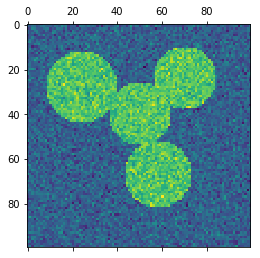

In [52]:
plt.matshow(img)
plt.show()

In [43]:
import warnings
from sklearn.cluster import spectral_clustering
from sklearn.feature_extraction import image

warnings.filterwarnings("ignore")

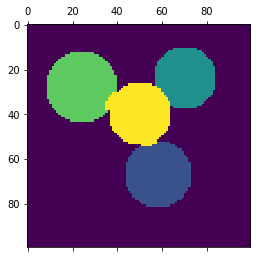

In [53]:
graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

labels = spectral_clustering(graph, n_clusters=4)
label_im = np.full(mask.shape, -1.)
label_im[mask] = labels

plt.matshow(label_im)

plt.show()

# Sources
---
1. Ulrike von Luxburg, "A Tutorial on Spectral Clustering"
2. Chung, F., "Spectral graph theory"
3. Ding, C., "A tutorial on spectral clustering"
4. Mohar B., "The Laplacian spectrum of graphs"

# Thank you